You are given an integer array matchsticks where matchsticks[i] is the length of the ith matchstick. You want to use all the matchsticks to make one square. You should not break any stick, but you can link them up, and each matchstick must be used exactly one time.

Return true if you can make this square and false otherwise.

 

Example 1:

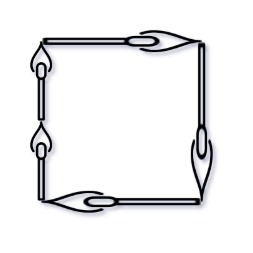

Input: matchsticks = [1,1,2,2,2]
Output: true
Explanation: You can form a square with length 2, one side of the square came two sticks with length 1.

Example 2:

Input: matchsticks = [3,3,3,3,4]
Output: false
Explanation: You cannot find a way to form a square with all the matchsticks.

 

Constraints:

    1 <= matchsticks.length <= 15
    1 <= matchsticks[i] <= 108



In [15]:
from typing import List
from functools import cache

class Solution:
    def makesquare(self, matchsticks: List[int]) -> bool:
        self.result = True
        p = sum(matchsticks)
        if p % 4:
            return False
        matchsticks = sorted(matchsticks, reverse=True)
        size = p // 4
        if max(matchsticks) > p:
            return False
        
        @cache
        def check(matchsticks, s0, s1, s2, s3):
            if len(matchsticks) == 0:
                if s0 == s1 == s2 == s3 or self.result:
                    self.result = True
                    return True
                else:
                    return False
                
            return any([
                check(matchsticks[1:], s0 + matchsticks[0], s1, s2, s3) if s0 + matchsticks[0] <= size else False, 
                check(matchsticks[1:], s0, s1 + matchsticks[0], s2, s3) if s1 + matchsticks[0] <= size else False, 
                check(matchsticks[1:], s0, s1, s2 + matchsticks[0], s3) if s2 + matchsticks[0] <= size else False, 
                check(matchsticks[1:], s0, s1, s2, s3 + matchsticks[0]) if s3 + matchsticks[0] <= size else False, 
            ])
        
        matchsticks = tuple(matchsticks)
        return check(matchsticks, 0, 0, 0, 0)

In [16]:
s = Solution()
s.makesquare([7,1,13,6,19,18,12,3,15,4,20,11,2,15,14])

True

In [17]:
s.makesquare([5969561,8742425,2513572,3352059,9084275,2194427,1017540,2324577,6810719,8936380,7868365,2755770,9954463,9912280,4713511])

False